In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/iris (3).csv")  # Replace with your filename if different

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Results for linear kernel
print("Linear Kernel SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Results for RBF kernel
print("\nRBF Kernel SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Linear Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


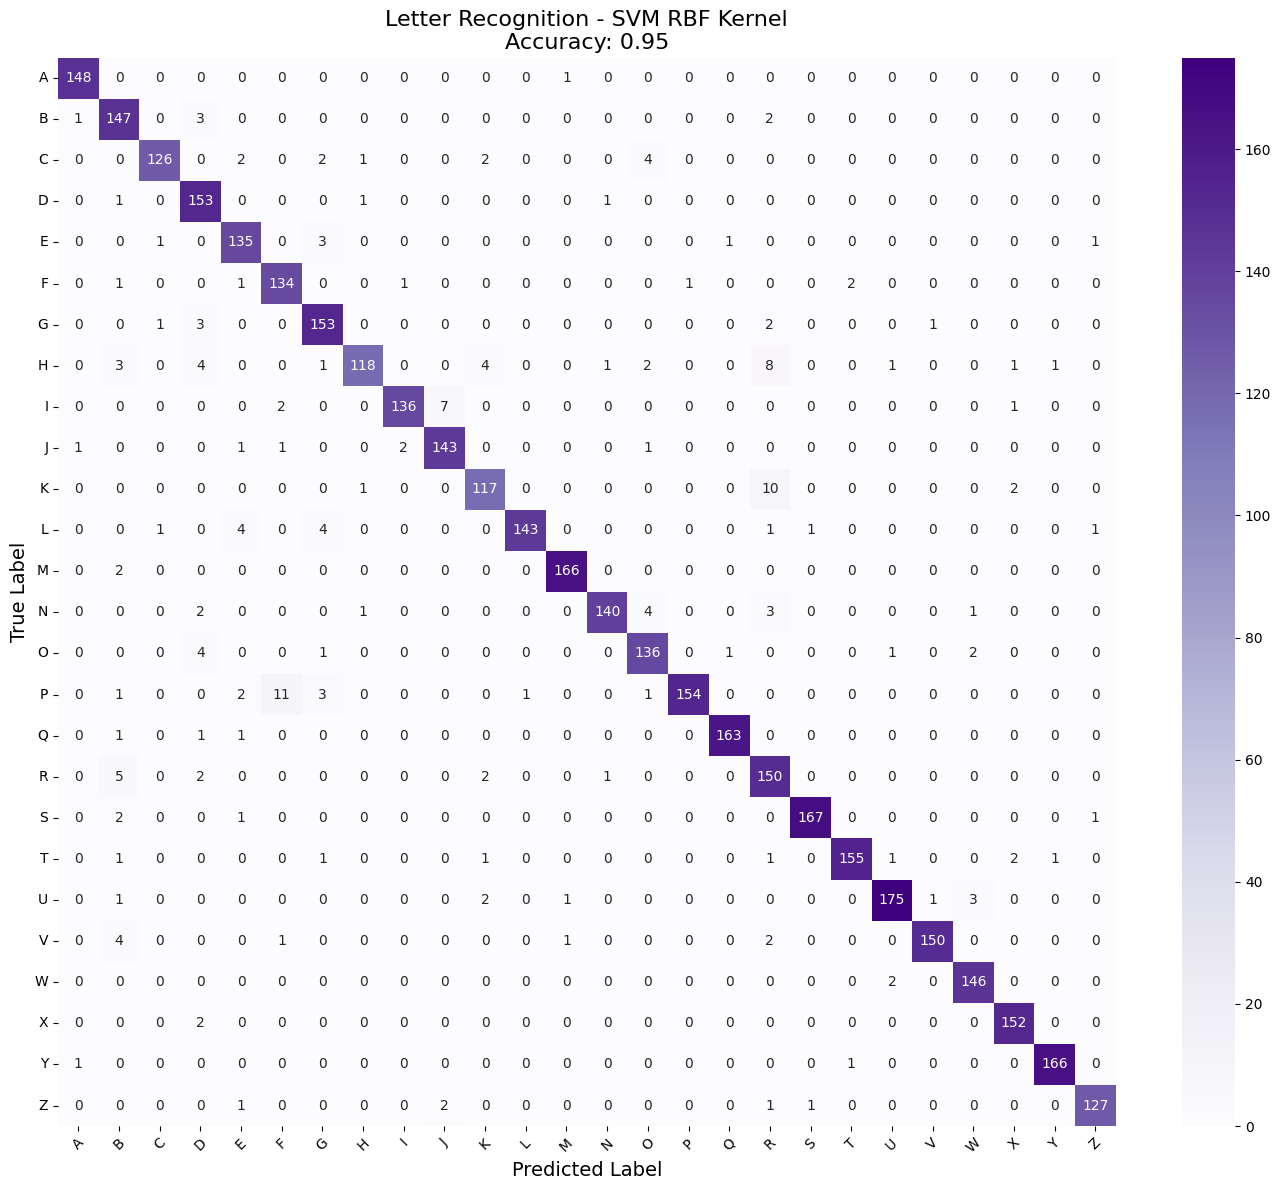

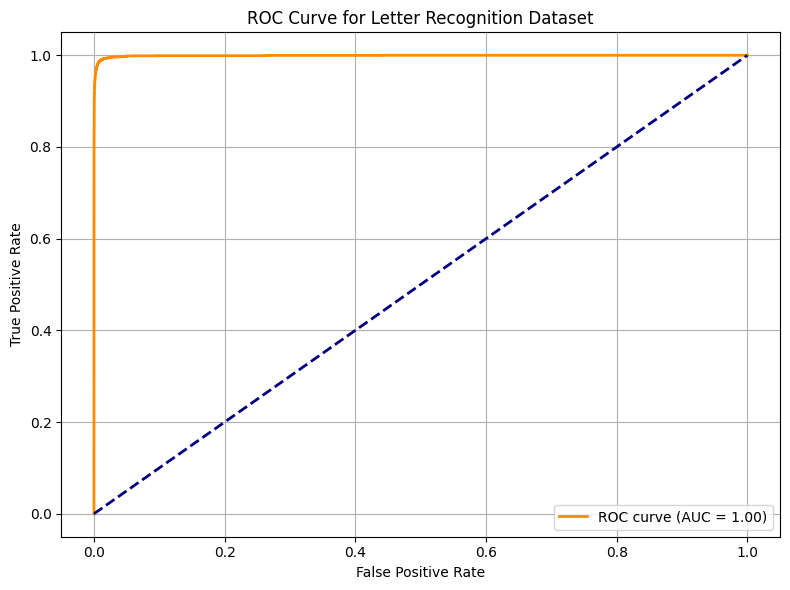

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

letters = pd.read_csv("/content/letter-recognition.csv")

X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)
y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)
cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            cbar=True)

plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters:.2f}', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

y_test_binarized = label_binarize(y_test_letters, classes=np.unique(y_letters_encoded))
y_score = svm_letters.predict_proba(X_test_letters)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()